# Time-Series : Forecasting

## Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-01-23 13:44:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-01-23 13:44:44 (7.49 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
8*365 # * years of data

2920

In [ ]:
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

🔑 Note: The seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
df.columns

Index(['Currency', 'Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)'],
      dtype='object')

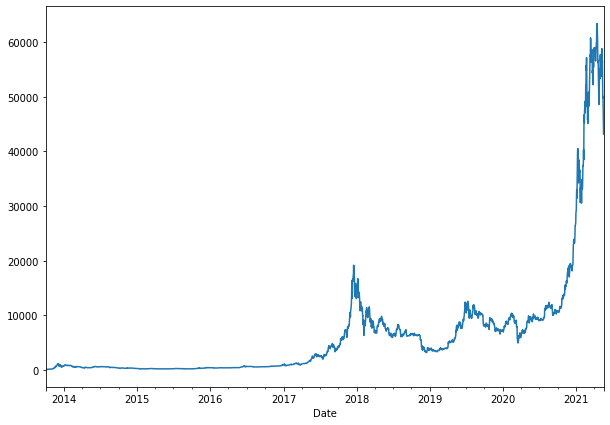

In [ ]:
df["Closing Price (USD)"].plot(figsize = (10, 7))

In [ ]:
# Reducing data only closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


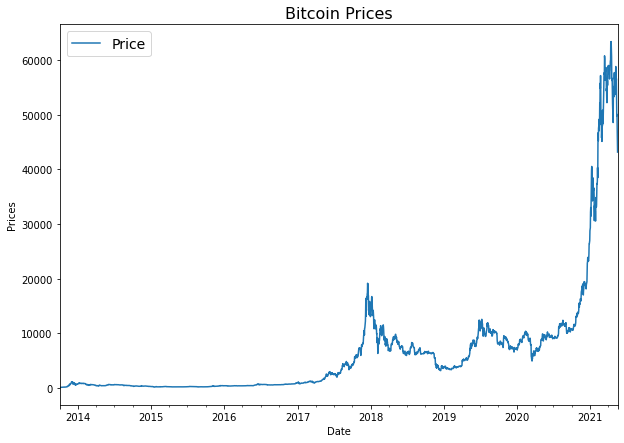

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("Prices")
plt.title("Bitcoin Prices", fontsize = 16)
plt.legend(fontsize = 14);

## Formating data part1: Create train and test sets of our time series data

### Train and test sets (the wrong way)

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

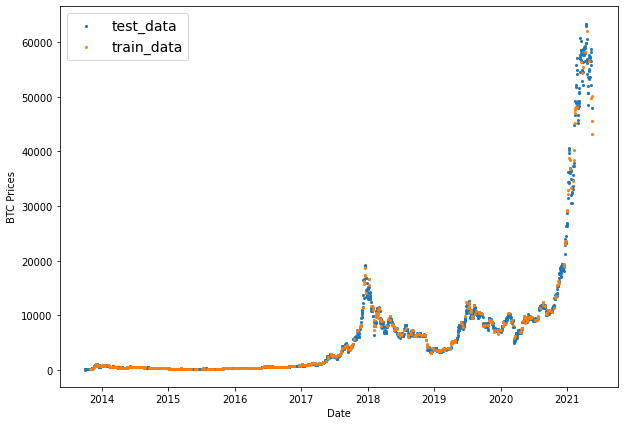

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 4, label = "test_data")
plt.scatter(X_test, y_test, s = 4, label = "train_data")
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize = 14)
plt.show();

### Train and Test Split: RIGHT WAY

In [ ]:
split_size = int(0.8 * len(prices)) #80 train, 20 test split

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

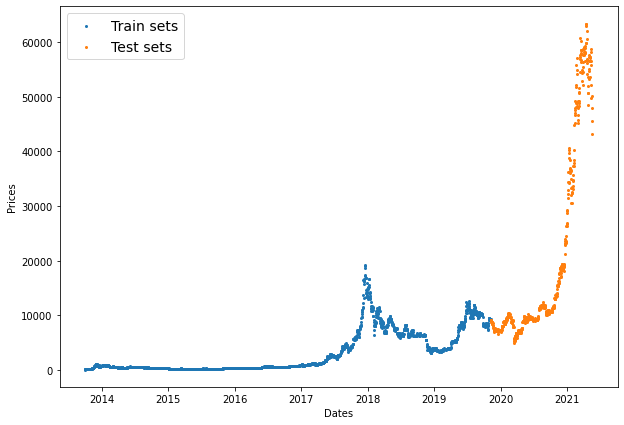

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 4 , label= ("Train sets"))
plt.scatter(X_test, y_test, s = 4, label = ("Test sets"))
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.legend(fontsize = 14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


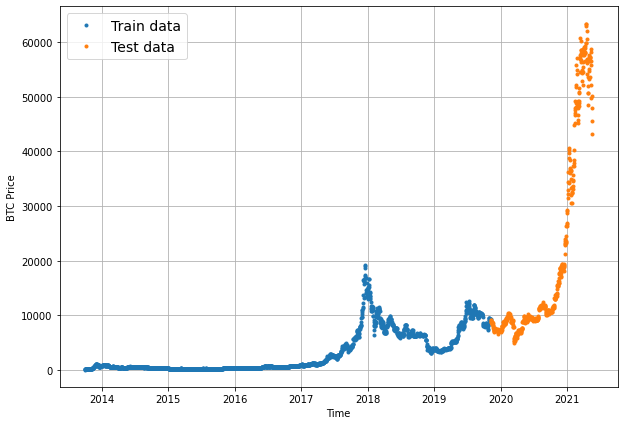

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

* Terms to be familiar with:

**Horizon** = number of timesteps into the future we're going to predict
**Window size** = number of timesteps we're going to use to predict horizon
Modelling experiments we're running:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive Forecast( Baseline)

$$\hat{y}_{t} = y_{t-1}$$

In English:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
# Creating naive model
naive_forecast = y_test[:-1]
naive_forecast[-10:], y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

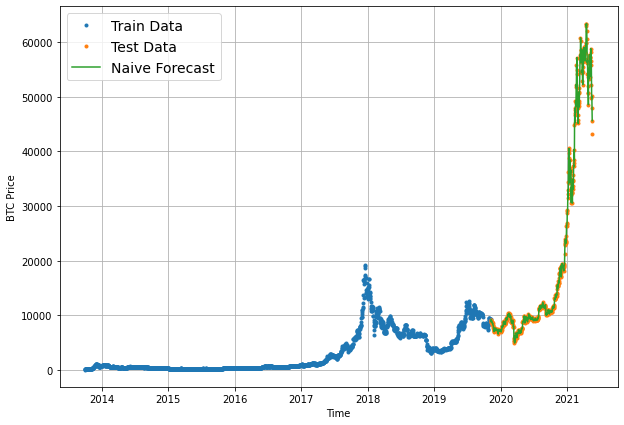

In [ ]:
# ploting naive_forecast
plt.figure(figsize = (10, 7))
plot_time_series(timesteps=X_train, values=y_train, label = "Train Data")
plot_time_series(timesteps=X_test, values = y_test, label = "Test Data")
plot_time_series(timesteps=X_test[1:], values = naive_forecast, format="-", label = "Naive Forecast")

## Evaluating time series forecasting

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8


In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive = tf.reduce_mean(tf.abs( y_true[1:] - y_true[:-1] ))

  return mae / mae_naive

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds( y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  results = {"MAE": mae.numpy(),
             "MSE": mse.numpy(),
             "RMSE": rmse.numpy(),
             "MAPE": mape.numpy(),
             "MASE": mase.numpy()}

  return results


In [ ]:
naive_forecast_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_forecast_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

## Format data part2 :Windowing our datasets

Why do we window?

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [ ]:
# What we want to do with our bitcoin data
print(f"We want to use: {prices[:7]} to predict: {prices[7]}")

We want to use: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict: 123.03299999999999


In [ ]:
HORIZON = 1
WINDOW = 7

In [ ]:
# create function to labelled window data
def get_labelled_windows(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# test our labelling function

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window)} --> Label: {tf.squeeze(test_label)}")

Window: [0 1 2 3 4 5 6] --> Label: 7


Now we need a way to make windows for an entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Let's write a function which:

* Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
* Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
[1, 2, 3, 4, 5, 6, 7, 8],
[2, 3, 4, 5, 6, 7, 8, 9]]
```
* Uses the 2D array of multuple window steps to index on a target series
* Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon


📖 Resource: The function created below has been adapted from Syafiq Kamarul Azman's article Fast and Robust Sliding Window Vectorization with NumPy.

In [ ]:
import numpy as np

In [ ]:
# Create function for view numpy array as windows
def make_windows(x, window_size = WINDOW, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis = 0).T # T --> Transpose
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)

In [ ]:
len(full_windows), len(full_labels), len(prices)

(2780, 2780, 2787)

In [ ]:
for i in range(3):
  print(f"Windows = {full_windows[i]} --> Labels = {full_labels[i]}")

Windows = [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Labels = [123.033]
Windows = [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Labels = [124.049]
Windows = [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Labels = [125.96116]


In [ ]:
for i in range(3):
  print(f"Windows = {full_windows[i-3]} --> Labels = {full_labels[i-3]}")

Windows = [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Labels = [47885.62525472]
Windows = [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Labels = [45604.61575361]
Windows = [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Labels = [43144.47129086]


🔑 Note: You can find a function which achieves similar results to the ones we implemented above at tf.keras.preprocessing.timeseries_dataset_from_array(). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Truning Windows and labels into train and test datasets

In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  split_size = int(len(windows) * (1 - test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_window, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(test_window), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW:])

True

## Make Modelling checkpoints

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, save_path = "Model_Experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense Model (win = 7, hori = 1)

We're going to start by keeping it simple, model_1 will have:

1. A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
2. An output layer with linear activation (or no activation)
3. Adam optimizer and MAE loss function
4. Batch size of 128
5. 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
          layers.Dense(128, activation="relu"),
          layers.Dense(HORIZON, activation="linear") # linear mean same output like None
], name = "Model_1_Dense")

model_1.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

history_1 = model_1.fit(x = train_windows, y = train_labels,
                        epochs = 100,
                        verbose = 1,
                        batch_size = 128,
                        validation_data = (test_window, test_labels),
                        callbacks = [
                                     create_model_checkpoint(model_name= model_1.name)
                        ])

Epoch 1/100
18/18 [==============================] - 3s 64ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 44ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 45ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 45ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 158.5

In [ ]:
model_1.evaluate(test_window, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# Loading in the best model from last checkpoint
model_1 = tf.keras.models.load_model("Model_Experiments/Model_1_Dense")
model_1.evaluate(test_window, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

##Making forecasts with a model (on the test dataset)¶

We've trained a model and evaluated the it on the test data, but the project we're working on is called BitPredict 💰📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:

1. Takes in a trained model (just like model_1)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_window)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
       8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_1_preds)
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

In [ ]:
naive_forecast_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

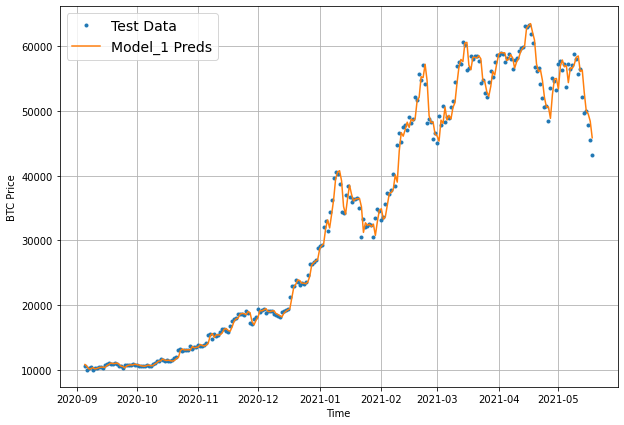

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps=X_test[-len(test_window):],
                 values= test_labels[:,0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_window):],
                 values = model_1_preds,
                 format = "-",
                 start = offset,
                 label = "Model_1 Preds")

## Model 2: Dense WINDOWS: 30, HORIZON: 1

In [ ]:
WINDOW_SIZE = 30
HORIZON = 1

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels = full_labels)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
          layers.Dense(128, activation = "relu"),
          layers.Dense(HORIZON, activation="linear")
], name = "Model_2_Dense")

model_2.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.Adam())

history_2 = model_2.fit(x = train_windows, y = train_labels,
                        epochs =100,
                        batch_size = 128,
                        verbose = 0,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_name= model_2.name)])

INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_2_Dense/assets
INFO:tensorflow:Assets written to: Mod

In [ ]:
model_2.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
model_2 = tf.keras.models.load_model("/content/Model_Experiments/Model_2_Dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615


608.9614868164062

In [ ]:
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8946.987 , 8967.846 , 8820.251 , 8615.828 , 8485.796 , 8384.62  ,
       8307.779 , 8171.7837, 8217.465 , 7839.1475], dtype=float32)>

In [ ]:
test_labels.shape

(552, 1)

In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'MAE': 608.9615,
 'MAPE': 2.7693386,
 'MASE': 1.0644706,
 'MSE': 1281438.8,
 'RMSE': 1132.0065}

In [ ]:
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

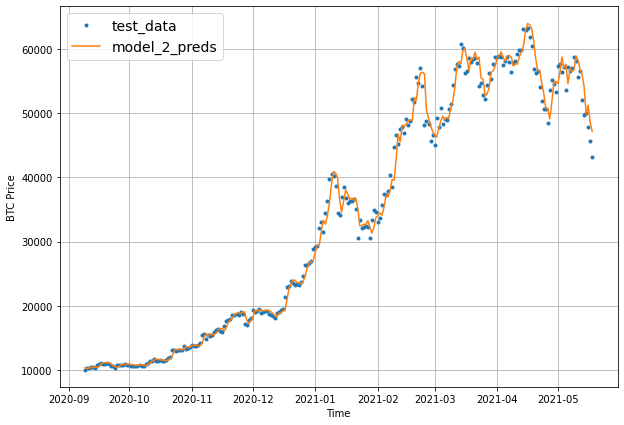

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))

plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:, 0], start = offset,
                 label = "test_data")
plot_time_series(timesteps= X_test[-len(test_windows):], values = model_2_preds, format = "-", start = offset,
                 label = "model_2_preds")

## Model 3: Dense : WINDOWS = 30, HORIZON = 7

In [ ]:
WINDOW_SIZE = 30
HORIZON = 7

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          layers.Dense(128, activation = "relu"),
          layers.Dense(HORIZON)
], name = "model_3_Dense")

model_3.compile( loss = "MAE",
                optimizer = tf.keras.optimizers.Adam())

history_3 = model_3.fit(train_windows, train_labels,
                        epochs =100,
                        batch_size = 128,
                        verbose = 0,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_name = model_3.name)])

INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Model_Experiments/model_3_Dense/assets
INFO:tensorflow:Assets written to: Mod

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5203


1321.520263671875

In [ ]:
model_3 = tf.keras.models.load_model("Model_Experiments/model_3_Dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.329 ,
        9156.819 ],
       [8672.509 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.723 ],
       [8874.399 , 8784.737 , 9043.901 , 8943.051 , 9033.479 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ],
       [8797.742 , 8840.091 , 9027.693 , 8974.781 , 9149.175 , 9229.459 ,
        8984.065 ],
       [8652.236 , 8803.884 , 9133.414 , 8876.115 , 8879.496 , 9111.171 ,
        8917.192 ],
       [8435.782 , 8533.1   , 8950.896 , 8667.983 , 8776.912 , 8752.908 ,
        8673.28  ],
       [8423.754 , 8317.123 , 8790.313 , 8533.363 , 8648.609 , 8623.756 ,
        8503.702 ],
       [8550.177 , 8408.629 , 8685.884 , 8591.83  , 8562.819 , 8604.392 ,
        8522.675 ]], dtype=floa

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': array([ 513.60516 ,  355.0837  ,  327.17007 ,  358.50992 ,  420.53207 ,
         537.8537  ,  545.6606  ,  485.92307 ,  584.4969  ,  687.3814  ,
         836.22675 ,  755.1571  ,  731.4958  ,  775.33984 ,  567.95465 ,
         266.80865 ,  188.80225 ,  188.1077  ,  253.09521 ,  301.43365 ,
         151.10742 ,  196.81424 ,  191.46184 ,  231.6506  ,  143.6114  ,
         122.5904  ,  132.78844 ,  190.8116  ,  179.1598  ,  228.25955 ,
         314.44022 ,  379.09293 ,  278.3254  ,  295.34604 ,  299.38525 ,
         248.64977 ,  299.7564  ,  259.6937  ,  180.30566 ,  206.72887 ,
         374.62912 ,  144.85149 ,  142.33607 ,  131.11559 ,   93.940636,
          54.825615,   73.79408 ,  103.59996 ,  121.33378 ,  168.67201 ,
         183.90945 ,  152.25307 ,  186.57129 ,  146.91309 ,  240.42955 ,
         351.00662 ,  540.9515  ,  549.15686 ,  521.2421  ,  526.8553  ,
         453.363   ,  257.9815  ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.9599  ,  503.44427 ,  522.3119 

## UPDATING evaluation ftn for larger horizon

In [ ]:
def evaluate_preds( y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  results = {"MAE": mae.numpy(),
             "MSE": mse.numpy(),
             "RMSE": rmse.numpy(),
             "MAPE": mape.numpy(),
             "MASE": mase.numpy()}

  return results


In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'MAE': 1237.5063,
 'MAPE': 5.5588784,
 'MASE': 2.2020736,
 'MSE': 5405198.0,
 'RMSE': 1425.7477}

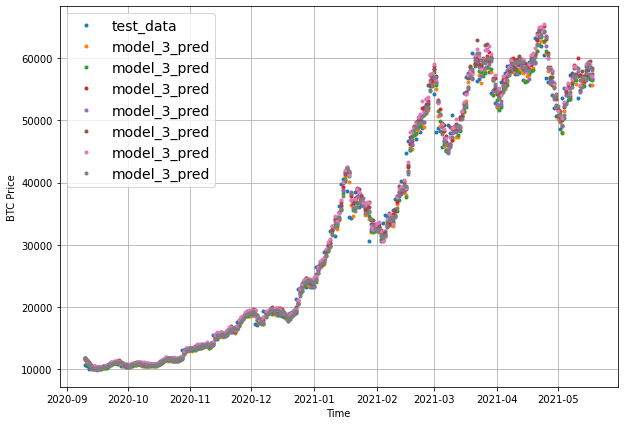

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:,0], start = offset,
                 label = "test_data")
plot_time_series(timesteps= X_test[-len(test_windows):], values = model_3_preds, start = offset,
                 label = "model_3_pred")

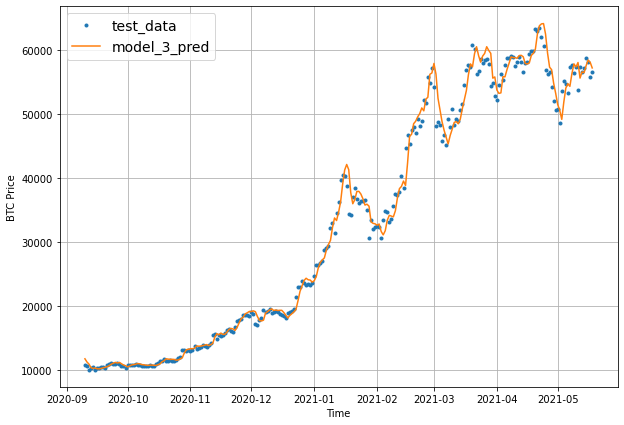

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps= X_test[-len(test_windows):], values = test_labels[:,0], start = offset,
                 label = "test_data")
plot_time_series(timesteps= X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis = 1),format = "-", start = offset,
                 label = "model_3_pred")

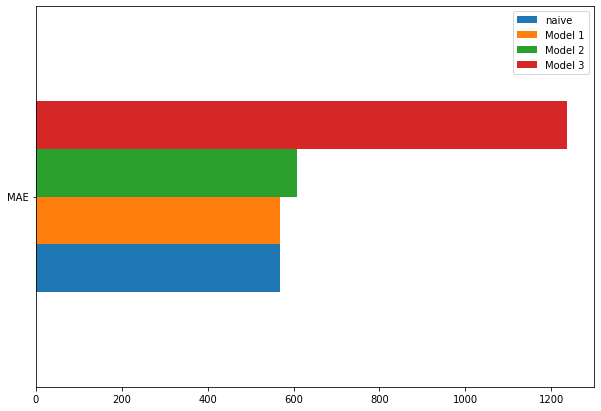

In [ ]:
all_results = pd.DataFrame({"naive": naive_forecast_results["MAE"],
                            "Model 1": model_1_results["MAE"],
                            "Model 2": model_2_results["MAE"],
                            "Model 3": model_3_results["MAE"]}, index = ["MAE"])
all_results.plot(figsize = (10, 7), kind = "barh");


## Model 4: Conv1D

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
full_windows, full_labels = make_windows(prices)

In [ ]:
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(test_windows)

(2224, 556)

Now, since we're going to be using Conv1D layers, we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).

In our case, the batch_size (by default this is 32 but we can change it) is handled for us but the other values will be:

timesteps = WINDOW_SIZE - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin
input_dim = HORIZON - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)
Right now, our data has the timesteps dimension ready but we'll have to adjust it to have the input_dim dimension.

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [ ]:
print(f"Original Shape:{x.shape}")
print(f"Expanded Shape:{expand_dims_layer(x).shape}")

Original Shape:(7,)
Expanded Shape:(7, 1)


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
          layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)),
          layers.Conv1D(filters=128, kernel_size = 5, padding = "causal", activation = "relu"),
          layers.Dense(HORIZON, activation = "linear")
], name = "Model_4_Conv1D")

model_4.compile(loss = "MAE",
                # optimizer = tf.keras.optimizers.Adam(),
                optimizer = "Adam")

history_4 = model_4.fit(train_windows, train_labels,
                        epochs = 100,
                        batch_size = 128,
                        verbose = 0,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_name = model_4.name)])

INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets written to: Model_Experiments/Model_4_Conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "Model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1538


610.15380859375

In [ ]:
model_4 = tf.keras.models.load_model("Model_Experiments/Model_4_Conv1D")

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8285


570.8284912109375

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.463, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.295,
       8661.667, 8494.839, 8435.317, 8492.114], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'MAE': 570.8284,
 'MAPE': 2.559336,
 'MASE': 1.0027875,
 'MSE': 1176671.4,
 'RMSE': 1084.7449}

## Model 5: LSTM

In [ ]:
%%time

tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))

x = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))(inputs)

# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)

# x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name = "model_5_lstm")

model_5.compile(loss ="MAE",
                optimizer = "Adam")
history_5 = model_5.fit(train_windows, train_labels,
                        epochs = 100,
                        batch_size = 128,
                        verbose = 1,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_5.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2475.4353INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 4s 165ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 776.7189 INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 164ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 258.4752INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 150ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 189.4982INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 152ms/step - loss: 181.9180 - val_loss: 966.6430
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 174.7254INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 172ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 178.5723INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 154ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 156.0559INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 159ms/step - loss: 157.6371 - val_loss: 887.1068
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 159.0397 - val_loss: 941.6472
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 166.8723 - val_loss: 932.8405
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 166.4009 - val_loss: 912.6633
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 169.3308 - val_loss: 911.7051
Epoch 13/100
18/18 [==============================] - 0s 11ms/step - loss: 163.4948 - val_loss: 912.0139
Epoch 14/100
18/18 [==============================] - 0s 11ms/step - loss: 161.2514 - val_loss: 954.6788
Epoch 15/100
18/18 [==============================] - 0s 11ms/step - loss: 160.0829 - val_loss: 929.0609
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 151.9167INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 156ms/step - loss: 150.1265 - val_loss: 837.1278
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 146.4163 - val_loss: 853.6609
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 160.1422 - val_loss: 872.8707
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 162.7850 - val_loss: 948.1254
Epoch 20/100
18/18 [==============================] - 0s 11ms/step - loss: 157.5906 - val_loss: 879.2178
Epoch 21/100
18/18 [==============================] - 0s 11ms/step - loss: 152.0355 - val_loss: 862.6779
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 150.7321 - val_loss: 837.5231
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 149.8567 - val_loss: 863.5775
Epoch 24/100
18/18 [==============================] - 0s 11ms/step - loss: 147.5116 - val_loss: 857.3812
Epoch 25/100
18/18 [==============================] - 0s 11ms/step 

INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 179ms/step - loss: 145.0650 - val_loss: 814.3981
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 143.7986INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 155ms/step - loss: 143.5609 - val_loss: 803.5717
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 138.4156INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 158ms/step - loss: 141.8002 - val_loss: 787.3266
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 140.9613 - val_loss: 802.5433
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 141.4158 - val_loss: 792.4999
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 138.2383INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 181ms/step - loss: 138.1068 - val_loss: 769.0401
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 137.8944INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 161ms/step - loss: 136.2222 - val_loss: 766.1754
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 136.6590 - val_loss: 799.5139
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 140.6088INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 157ms/step - loss: 136.5250 - val_loss: 751.2918
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 133.8809 - val_loss: 760.8372
Epoch 36/100
18/18 [==============================] - 0s 11ms/step - loss: 154.6745 - val_loss: 755.5354
Epoch 37/100
18/18 [==============================] - 0s 10ms/step - loss: 155.9529 - val_loss: 830.3295
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 138.2673INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 158ms/step - loss: 133.3048 - val_loss: 721.6966
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 133.3641INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 180ms/step - loss: 130.8634 - val_loss: 716.1732
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 131.4340 - val_loss: 722.9930
Epoch 41/100
14/18 [======================>.......] - ETA: 0s - loss: 131.3857INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 159ms/step - loss: 127.9265 - val_loss: 706.7328
Epoch 42/100
18/18 [==============================] - 0s 10ms/step - loss: 126.9680 - val_loss: 711.0533
Epoch 43/100
14/18 [======================>.......] - ETA: 0s - loss: 123.2430INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 154ms/step - loss: 125.9146 - val_loss: 699.5353
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 122.4873INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 152ms/step - loss: 126.0430 - val_loss: 694.9196
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 121.2653INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 170ms/step - loss: 124.3085 - val_loss: 688.0770
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 125.3113 - val_loss: 688.4483
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 123.8175 - val_loss: 697.9514
Epoch 48/100
13/18 [====================>.........] - ETA: 0s - loss: 121.3135INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 157ms/step - loss: 123.1645 - val_loss: 678.4639
Epoch 49/100
18/18 [==============================] - 0s 11ms/step - loss: 122.5109 - val_loss: 691.3550
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 124.5405 - val_loss: 711.7109
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 125.1063 - val_loss: 767.2318
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 129.4537INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 151ms/step - loss: 124.1389 - val_loss: 667.4608
Epoch 53/100
13/18 [====================>.........] - ETA: 0s - loss: 119.0589INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 175ms/step - loss: 120.9903 - val_loss: 664.1362
Epoch 54/100
18/18 [==============================] - 0s 11ms/step - loss: 120.4420 - val_loss: 668.9783
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 127.4062INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 158ms/step - loss: 120.3250 - val_loss: 657.9633
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 122.1996INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 152ms/step - loss: 120.8700 - val_loss: 651.8962
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 123.8955 - val_loss: 676.6164
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 118.7292INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 169ms/step - loss: 119.2845 - val_loss: 647.5352
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 118.8511 - val_loss: 650.0970
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 119.7555 - val_loss: 647.5707
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 120.2817 - val_loss: 713.6541
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 125.3768 - val_loss: 794.2557
Epoch 63/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9135 - val_loss: 664.7369
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 118.2151 - val_loss: 674.3688
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 121.7638INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 151ms/step - loss: 120.2008 - val_loss: 642.3018
Epoch 66/100
15/18 [========================>.....] - ETA: 0s - loss: 119.2842INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 154ms/step - loss: 118.4315 - val_loss: 641.6985
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 117.7635INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 152ms/step - loss: 119.0471 - val_loss: 634.3810
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 116.6638 - val_loss: 636.2444
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 120.7408 - val_loss: 634.6295
Epoch 70/100
13/18 [====================>.........] - ETA: 0s - loss: 112.8873INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 173ms/step - loss: 115.4599 - val_loss: 626.6804
Epoch 71/100
18/18 [==============================] - 0s 11ms/step - loss: 115.9339 - val_loss: 656.0879
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 119.8699 - val_loss: 632.4768
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 116.7878 - val_loss: 632.6958
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 115.9789 - val_loss: 628.7859
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 116.2208 - val_loss: 649.0289
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 117.0039INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 154ms/step - loss: 115.7762 - val_loss: 619.4288
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 116.0675 - val_loss: 678.6984
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 117.8725 - val_loss: 637.9999
Epoch 79/100
14/18 [======================>.......] - ETA: 0s - loss: 110.7370INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 150ms/step - loss: 114.5718 - val_loss: 615.1740
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 113.9234 - val_loss: 624.7345
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3944 - val_loss: 639.4200
Epoch 82/100
18/18 [==============================] - 0s 10ms/step - loss: 116.8732 - val_loss: 617.3772
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0267 - val_loss: 634.4542
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1687 - val_loss: 629.7076
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 115.5395 - val_loss: 627.2795
Epoch 86/100
15/18 [========================>.....] - ETA: 0s - loss: 114.1115INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 153ms/step - loss: 116.9436 - val_loss: 612.4603
Epoch 87/100
18/18 [==============================] - 0s 11ms/step - loss: 113.0372 - val_loss: 612.8317
Epoch 88/100
14/18 [======================>.......] - ETA: 0s - loss: 117.4971INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 173ms/step - loss: 113.1021 - val_loss: 606.8931
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 113.0304 - val_loss: 642.7141
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 118.6202 - val_loss: 646.4847
Epoch 91/100
18/18 [==============================] - 0s 11ms/step - loss: 117.4917 - val_loss: 663.0123
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 114.2570 - val_loss: 622.4062
Epoch 93/100
13/18 [====================>.........] - ETA: 0s - loss: 115.7640INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 151ms/step - loss: 113.8049 - val_loss: 604.2598
Epoch 94/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6148INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 148ms/step - loss: 111.5645 - val_loss: 602.4208
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 111.7520INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 171ms/step - loss: 111.9235 - val_loss: 601.1179
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3632 - val_loss: 607.5757
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 112.2150 - val_loss: 633.6397
Epoch 98/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6847 - val_loss: 605.8774
Epoch 99/100
14/18 [======================>.......] - ETA: 0s - loss: 109.0901INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: Model_Experiments/model_5_lstm/assets


18/18 [==============================] - 3s 154ms/step - loss: 111.3979 - val_loss: 598.6749
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0812 - val_loss: 599.3067
CPU times: user 1min 59s, sys: 6.02 s, total: 2min 5s
Wall time: 1min 57s


In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 599.3067


599.3067016601562

In [ ]:
model_5 = tf.keras.models.load_model("Model_Experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 598.6749


598.6749267578125

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8983.033, 8811.561, 8991.205, 8832.373, 8724.737], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'MAE': 598.67487,
 'MAPE': 2.6902084,
 'MASE': 1.051706,
 'MSE': 1279866.4,
 'RMSE': 1131.3118}

## Making Multivariate Time-series datasets

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let make a multivariate time series, by adding bitcoin halving events
block_reward_1 = 50 # 3 Jan 2009, but we dont have the data from 2009 (our data 01-10-2013)
block_reward_2 = 25 # 28 Nov 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block Reward Dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date range where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# First create a column fo block reward
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block reward values as features to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4



In [ ]:
bitcoin_prices_block.iloc[1500:1550], bitcoin_prices_block.tail()

(                  Price block_reward
 Date                                
 2017-11-09   7342.82375         12.5
 2017-11-10   7250.77000         12.5
 2017-11-11   6773.69500         12.5
 2017-11-12   6075.30125         12.5
 2017-11-13   5969.13000         12.5
 2017-11-14   6666.27125         12.5
 2017-11-15   6867.42625         12.5
 2017-11-16   7259.30000         12.5
 2017-11-17   7924.18250         12.5
 2017-11-18   7598.27750         12.5
 2017-11-19   7787.45625         12.5
 2017-11-20   7954.76750         12.5
 2017-11-21   7879.06000         12.5
 2017-11-22   8150.63250         12.5
 2017-11-23   8208.75375         12.5
 2017-11-24   8094.44500         12.5
 2017-11-25   8190.87125         12.5
 2017-11-26   8851.30500         12.5
 2017-11-27   9573.96750         12.5
 2017-11-28   9713.09625         12.5
 2017-11-29  10295.62250         12.5
 2017-11-30  10542.66250         12.5
 2017-12-01   9706.10375         12.5
 2017-12-02  10923.20125         12.5
 2017-12-03 

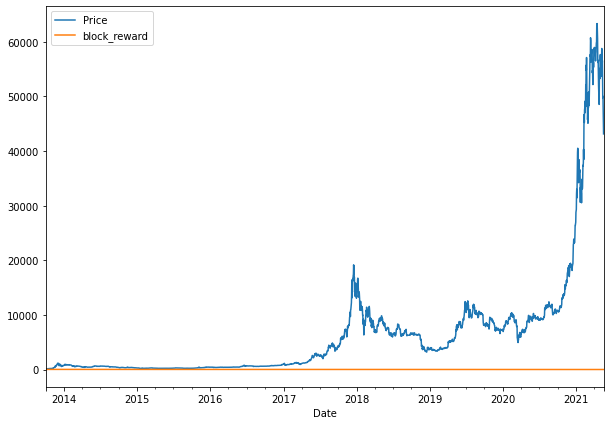

In [ ]:
bitcoin_prices_block.plot(figsize = (10, 7));

As the prices and block rewards are on different scale we have to scalle the values to plot them on same graph

In [ ]:
bitcoin_prices_block.columns

Index(['Price', 'block_reward'], dtype='object')

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_price_block = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                  columns = bitcoin_prices_block.columns,
                                  index = bitcoin_prices_block.index)
scaled_price_block.head()

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0


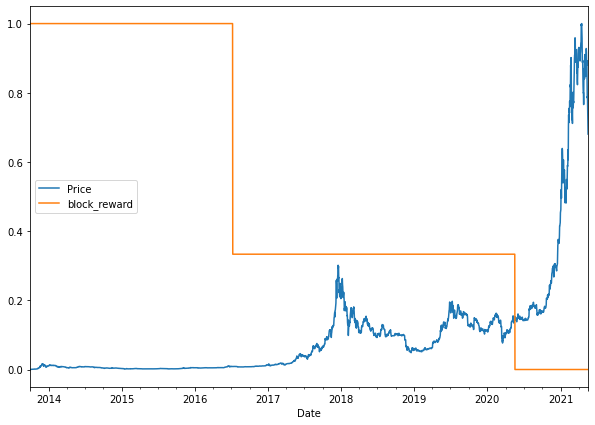

In [ ]:
scaled_price_block.plot(figsize = (10, 7));

## Making a windowed dataset using pandas

our `make_windows()` converts 1D (univariate) to 2D, so we will use `pandas.DataFrame.shift()` method to window our multivariate data

In [ ]:
# Setup data hyperparameter
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add a windowed column
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_block["Price"].shift(periods = i+1)

In [ ]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Converting them into windowed fatures and horizon X, y
X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train test splits
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
model_1.summary()

Model: "Model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
          layers.Dense(128, activation="relu"),
          layers.Dense(128, activation="relu"),
          layers.Dense(HORIZON, activation="linear")
], name = "Model_6_Multivariate")

model_6.compile(loss = "MAE",
                optimizer = "Adam")

history_6 = model_6.fit(X_train, y_train,
                        epochs = 100,
                        batch_size = 128,
                        verbose = 1,
                        validation_data = (X_test, y_test),
                        callbacks = [create_model_checkpoint(model_6.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 740.0436 INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 2s 76ms/step - loss: 708.7571 - val_loss: 2263.3032
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 211.7339INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 209.3598 - val_loss: 882.9350
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 157.2348INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 155.8663 - val_loss: 819.8377
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 147.2962INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 146.5632 - val_loss: 799.7484
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7775INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 132.3965 - val_loss: 693.0830
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 123.7322INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 125.7849 - val_loss: 659.4672
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 122.0054 - val_loss: 715.4888
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 120.0701INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 47ms/step - loss: 120.0701 - val_loss: 636.3212
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8690 - val_loss: 813.5287
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6461 - val_loss: 798.1339
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 132.8748 - val_loss: 954.1594
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.3553 - val_loss: 760.2549
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1712 - val_loss: 744.8667
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9032 - val_loss: 676.4730
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 128.2026 - val_loss: 650.1194
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 121.0512INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 120.1517 - val_loss: 607.5732
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3910 - val_loss: 613.7141
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 112.9108INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 47ms/step - loss: 111.6833 - val_loss: 594.0024
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7085INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 115.6327 - val_loss: 587.0794
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1031 - val_loss: 610.2460
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3326 - val_loss: 746.6410
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3824INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 119.9599 - val_loss: 584.4871
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9239 - val_loss: 633.5179
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8530 - val_loss: 744.4088
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2092 - val_loss: 621.2405
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4809 - val_loss: 616.5063
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2301 - val_loss: 586.4801
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 107.8996INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 107.8962 - val_loss: 577.8256
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8487 - val_loss: 605.5063
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9190 - val_loss: 622.7374
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3989 - val_loss: 583.1697
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 110.0402INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 47ms/step - loss: 110.4221 - val_loss: 574.4394
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4232 - val_loss: 584.2969
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3021 - val_loss: 681.6036
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6243 - val_loss: 685.6687
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9770 - val_loss: 589.9262
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6149 - val_loss: 610.3578
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3095 - val_loss: 629.7593
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1903 - val_loss: 576.9448
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 107.4169 - val_loss: 577.9578
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 10

INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 111.5022 - val_loss: 572.1922
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 105.5641INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 48ms/step - loss: 105.0783 - val_loss: 570.3768
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0239 - val_loss: 583.6283
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0586 - val_loss: 632.0323
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8050 - val_loss: 597.8691
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 103.4828INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 46ms/step - loss: 105.1643 - val_loss: 570.2969
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7897 - val_loss: 863.3895
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0439 - val_loss: 797.6616
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 121.7918 - val_loss: 648.4112
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 119.4072 - val_loss: 705.8712
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6557 - val_loss: 610.5170
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0141 - val_loss: 603.0491
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0033 - val_loss: 744.6333
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3403 - val_loss: 889.7564
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 12

INFO:tensorflow:Assets written to: Model_Experiments/Model_6_Multivariate/assets


18/18 [==============================] - 1s 67ms/step - loss: 104.4472 - val_loss: 568.4493
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8395 - val_loss: 614.3585
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3847 - val_loss: 675.6929
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5268 - val_loss: 575.9048
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8737 - val_loss: 636.9820
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 104.6579 - val_loss: 572.9103
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 103.8628 - val_loss: 568.5963
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9379 - val_loss: 568.8134
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7746 - val_loss: 610.8445
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 11

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 866.1635


866.1635131835938

In [ ]:
model_6 = tf.keras.models.load_model("Model_Experiments/Model_6_Multivariate")

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.4493


568.4492797851562

In [ ]:
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8813.428, 8767.833, 9045.074, 8723.28 , 8713.942, 8744.135,
       8651.524, 8490.182, 8448.835, 8518.019], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'MAE': 568.4493,
 'MAPE': 2.5558891,
 'MASE': 0.99860793,
 'MSE': 1162442.1,
 'RMSE': 1078.1661}

In [ ]:
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

In [ ]:
naive_forecast_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

## Model 7: N-BEATS Algorithm


*   Block layer
*   Stack layer
* Model



### Buidling and testing the N-BEATS block layer

In [ ]:
# Create N-BEATS custom layer (subclass)
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self,
               input_size : int,
               theta_size : int,
               horizon : int,
               n_neurons : int,
               n_layers : int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contain 4 fully connected layers each with "ReLU" activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # Output of the Block in theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name = "theta")

  def call(self, inputs):
    x = inputs

    for layers in self.hidden:
      x = layers(x)

    theta = self.theta_layer(x)
    # Output the backcast and forecast from the theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [ ]:
tf.random.set_seed(42)
# setup dummay NBEATSBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [ ]:
# creating dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE), axis = 0) # expanding bcz dense require input ndim 2 (batchsize, input_dims)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.10131834  0.22201723 -0.6684059  -0.48202288 -0.26080495 -0.40846485
 -0.49386612]
Forecast: 0.7937623262405396


### Preparing data for N-BEATS algo with tf.data api

In [ ]:
HORIZON =1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs (N-BEATS is a univariate time series point forecasting algo)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices["Price"].shift(periods = i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# using tf.data api to increase performance
train_features_datasets = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_datasets = tf.data.Dataset.from_tensor_slices(y_train)

test_features_datasets = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_datasets = tf.data.Dataset.from_tensor_slices(y_test)

# combine features and labels by zipping --> (features, labels)
train_datasets = tf.data.Dataset.zip((train_features_datasets, train_labels_datasets))
test_datasets = tf.data.Dataset.zip((test_features_datasets, test_labels_datasets))

# batch and prefetch
BATCH_SIZE = 1024
train_datasets = train_datasets.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_datasets =  test_datasets.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_datasets, test_datasets

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hypermeters for the N-BEATS Algo

In [ ]:
# Values from N-BEATS paper

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

In [ ]:
# Make a dummy tensors to check the residual connections (tf has already buildin layers)
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])


In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

### Building, compiling and fitting the N-BEATS NN

We'll do so by going through the following:

* Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
* Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
* Make the initial backcast and forecasts for the model with the layer created in (1)
* Use a for loop to create stacks of block layers
* Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
* Create the double residual stacking using subtract and add layers
* Put the model inputs and outputs together using `tf.keras.Model()`
* Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
* Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
* > `tf.keras.callbacks.EarlyStopping()` - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)

* > `tf.keras.callbacks.ReduceLROnPlateau()` - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)



In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS instance
nbeats_block_layer = NBeatsBlock(input_size= INPUT_SIZE, theta_size= THETA_SIZE,
                                  horizon = HORIZON, n_neurons = N_NEURONS,
                                  n_layers = N_LAYERS, name = "InitialBlock")

# 2. Create stack input
stack_input = layers.Input(shape = (INPUT_SIZE), name = "stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. create stack of block layer
for i, _ in enumerate(range(N_STACKS - 1)):

  # 5. Use NBEATS_BLOCK to calculate backcast as well as forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Create the double residuals stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}")

# 7. put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "Model_7_NBEATS")

# 8.
model_7.compile( loss = "MAE",
                optimizer = tf.keras.optimizers.Adam())

# 9.
history_7 = model_7.fit(train_datasets,
                        epochs = N_EPOCHS,
                        verbose = 0,
                        validation_data = test_datasets,
                        callbacks =[
                                    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                     patience = 200,
                                                                     restore_best_weights = True),
                                    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                         patience = 100,
                                                                         verbose = 1)
                        ])


Epoch 00355: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00455: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 43s, sys: 3.68 s, total: 2min 47s
Wall time: 3min 39s


In [ ]:
model_7.evaluate(test_datasets)

1/1 [==============================] - 0s 46ms/step - loss: 573.8849


573.8848876953125

In [ ]:
model_7_preds = make_preds(model_7, test_datasets)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8859.602, 8791.735, 9003.564, 8791.927, 8763.354, 8751.274,
       8632.345, 8522.751, 8483.132, 8507.291], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true= y_test, y_pred = model_7_preds)
model_7_results

{'MAE': 573.8849,
 'MAPE': 2.6982493,
 'MASE': 1.0081568,
 'MSE': 1136841.1,
 'RMSE': 1066.2275}

In [ ]:
naive_forecast_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

In [ ]:
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

In [ ]:
model_6_results

{'MAE': 568.4493,
 'MAPE': 2.5558891,
 'MASE': 0.99860793,
 'MSE': 1162442.1,
 'RMSE': 1078.1661}

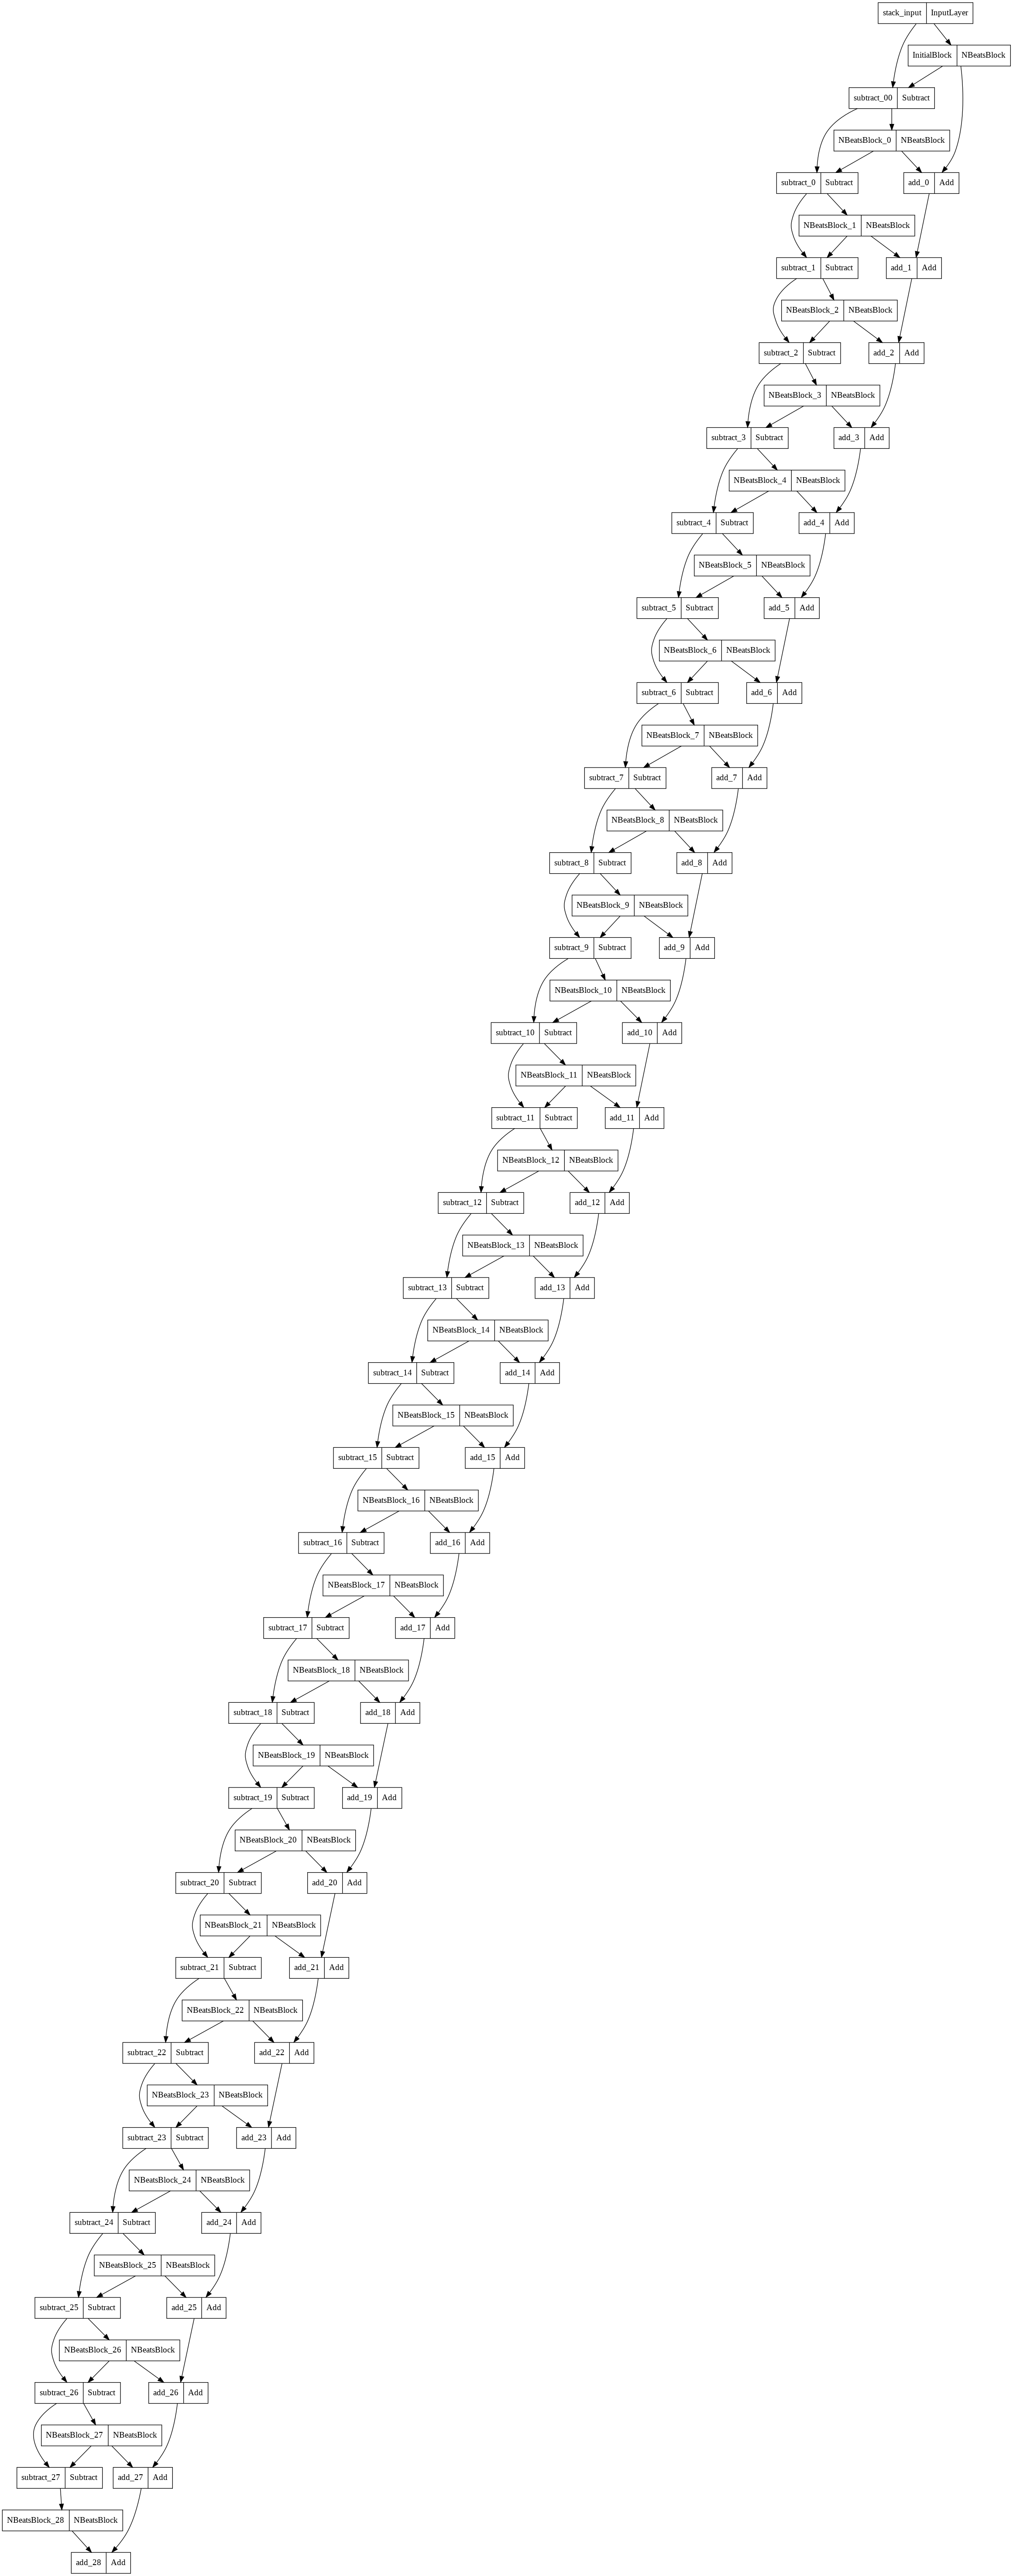

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
model_7.summary()

Model: "Model_7_NBEATS"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 stack_input (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 InitialBlock (NBeatsBlock)     ((None, 7),          796168      ['stack_input[0][0]']            
                                 (None, 1))                                                       
                                                                                                  
 subtract_00 (Subtract)         (None, 7)            0           ['stack_input[0][0]',            
                                                                  'InitialBlock[0][0]']           
                                                                                     

## Model 8: Ensemble (Multiple Models stacked together)

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting the ensembles of model(first using different loss functions)


In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_datasets,
                        test_data = test_datasets,
                        num_iter = 10,
                        num_epochs =1000,
                        loss_fns = ["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing loss function by {loss_function} for epoch {num_epochs}, model: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
         layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
         layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
         layers.Dense(horizon)
      ])

      model.compile( loss = loss_function,
                    optimizer = "Adam",
                    metrics = ["mae", "mse"])
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks =[
                            tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                             patience = 200,
                                                             restore_best_weights = True),
                            tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                 patience = 100,
                                                                 verbose = 1)
                ])

      ensemble_models.append(model)

  return ensemble_models


In [ ]:
%%time

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs = 1000)

Optimizing loss function by mae for epoch 1000, model: 0

Epoch 00994: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing loss function by mse for epoch 1000, model: 0

Epoch 00589: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00705: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00805: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing loss function by mape for epoch 1000, model: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing loss function by mae for epoch 1000, model: 1
Optimizing loss function by mse for epoch 1000, model: 1

Epoch 00362: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00462: ReduceLROnPlateau reducing learning rate to 

In [ ]:
len(ensemble_models)

15

### Make preds on our ensemble models

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models= ensemble_models,
                                     data = test_datasets)

CPU times: user 842 ms, sys: 40.6 ms, total: 883 ms
Wall time: 848 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8799.1045,  8804.104 ,  9084.047 , ..., 50665.848 , 49904.15  ,
        46858.945 ],
       [ 8763.673 ,  8740.216 ,  9051.262 , ..., 49348.504 , 48498.58  ,
        45329.64  ],
       [ 8732.569 ,  8719.407 ,  9093.386 , ..., 49921.9   , 47992.15  ,
        45316.45  ],
       ...,
       [ 8949.705 ,  8786.917 ,  9058.851 , ..., 49483.89  , 49856.008 ,
        46650.887 ],
       [ 8728.58  ,  8805.318 ,  9102.789 , ..., 49588.684 , 48535.84  ,
        45059.195 ],
       [ 8816.509 ,  8760.896 ,  9040.058 , ..., 49718.207 , 48048.062 ,
        45818.816 ]], dtype=float32)>

In [ ]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [ ]:
ensemble_results = evaluate_preds(y_test, ensemble_preds)
ensemble_results

{'MAE': 581.2282,
 'MAPE': 2.6617072,
 'MASE': 1.0210569,
 'MSE': 1183851.2,
 'RMSE': 1087.8738}

In [ ]:
# Evaluate ensemble model(s) predictions by finding the median along 0 axis
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'MAE': 567.6892,
 'MAPE': 2.5818336,
 'MASE': 0.99727273,
 'MSE': 1145055.2,
 'RMSE': 1070.0725}

In [ ]:
# Evaluate ensemble model(s) predictions by finding the mean along 0 axis
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=tf.reduce_mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'MAE': 567.25037,
 'MAPE': 2.581879,
 'MASE': 0.9965018,
 'MSE': 1143951.2,
 'RMSE': 1069.5565}

In [ ]:
naive_forecast_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

### Plotting prediction intervals (uncertainty estimate) of our ensemble

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
5. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper



In [ ]:
# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8672.185 ,  8716.776 ,  9010.932 ,  8619.611 ,  8640.735 ,
         8638.55  ,  8606.215 ,  8374.994 ,  8385.511 ,  8486.522 ,
         8116.3794,  8028.8164,  7990.4067,  7549.2617,  7156.7754,
         7186.567 ,  6952.495 ,  7117.8247,  6982.4053,  7480.9243,
         7300.0063,  7672.176 ,  7472.475 ,  7273.4937,  7231.2915,
         7260.798 ,  7133.652 ,  7341.3594,  7458.1387,  7489.8857,
         7462.7563,  7255.278 ,  7168.3926,  7133.748 ,  7141.7124,
         7174.02  ,  7014.1055,  7053.343 ,  6790.6387,  6530.3955,
         7286.895 ,  7080.1997,  7047.816 ,  7159.425 ,  7106.13  ,
         7063.581 ,  7161.721 ,  7172.3125,  7130.822 ,  7160.8457,
         7266.1294,  7334.6694,  7178.7144,  7106.332 ,  7116.484 ,
         6884.092 ,  7233.1216,  7278.5596,  7304.4917,  7596.4087,
         7955.1357,  8066.8887,  7765.2227,  7997.6367,  8002.362 ,
         8111.618 ,  7997.7275,  8659.3   ,  8805.737 ,  8677.655 ,

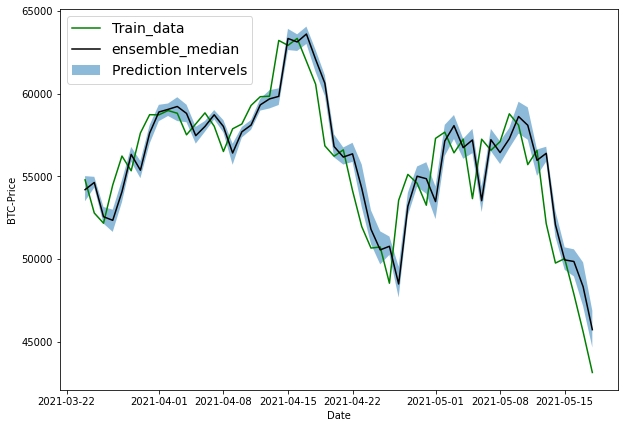

In [ ]:
# Get the median/mean of the ensemble preds

ensemble_median = np.median(ensemble_preds, axis = 0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Train_data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label = "ensemble_median")
plt.xlabel("Date")
plt.ylabel("BTC-Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = "Prediction Intervels",
                 alpha = 0.5)
plt.legend(loc = "upper left", fontsize = 14);

## Model:9 Train a model to predict on the full historical dataset to make predictions into the future

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire dataset
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
label_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

train_dataset_all = tf.data.Dataset.zip((feature_dataset_all, label_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(HORIZON)
], name  = "model_9")
model_9.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.Adam())

model_9.fit(train_dataset_all,
            epochs = 100,
            verbose = 0)

###Make Predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

To do so, we'll build the following steps:

1. Function which takes as input:
    * a list of values (the Bitcoin historical data)
    * a trained model (such as model_9)
    * a window into the future to predict (our INTO_FUTURE variable)
    * the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction
  * Eventually future predictions will be made using the model's own previous predictions as input

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875

Predicting on: 
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875

Predicting on: 
 [43144.47129086 55764.46484375 50985.9453125  48522.96

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

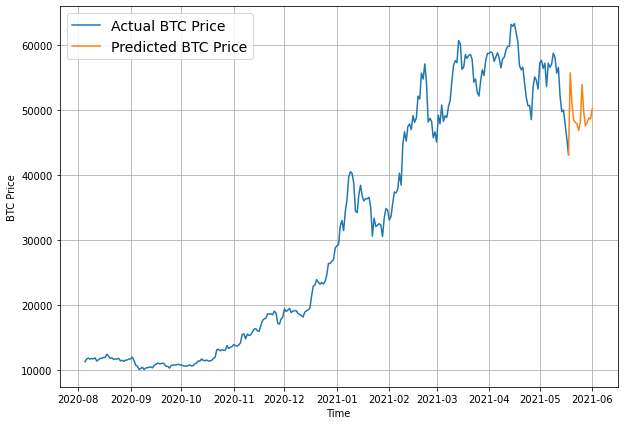

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (Turkey problem)

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

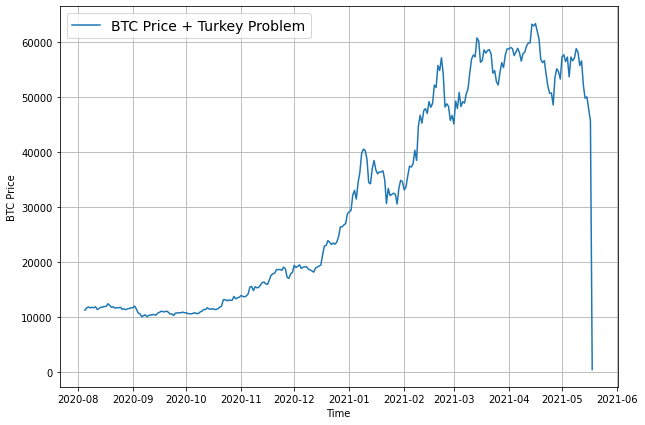

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


INFO:tensorflow:Assets written to: Model_Experiments/Turkey_Model/assets


In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 696.1285


696.1284790039062

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("Model_Experiments/Turkey_Model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 638.3047


638.3046875

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.391, 8803.98 , 9039.575, 8785.937, 8778.044, 8735.638,
       8684.118, 8558.659, 8461.373, 8542.206], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'MAE': 17144.766,
 'MAPE': 121.58286,
 'MASE': 26.53158,
 'MSE': 615487800.0,
 'RMSE': 23743.305}

In [ ]:
model_1_results

{'MAE': 568.95123,
 'MAPE': 2.5448983,
 'MASE': 0.9994897,
 'MSE': 1171744.0,
 'RMSE': 1082.4713}

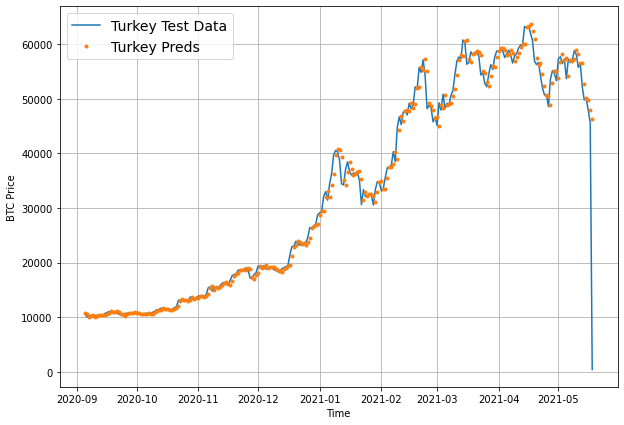

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare different model results

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_forecast_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,MAE,MSE,RMSE,MAPE,MASE
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471313,2.544898,0.999490
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,1.064471
model_3_dense_w30_h7,1237.506348,5.405198e+06,1425.747681,5.558878,2.202074
model_4_CONV1D,570.828430,1.176671e+06,1084.744873,2.559336,1.002787
model_5_LSTM,598.674866,1.279866e+06,1131.311768,2.690208,1.051706
model_6_multivariate,568.449280,1.162442e+06,1078.166138,2.555889,0.998608
model_8_NBEATs,573.884888,1.136841e+06,1066.227539,2.698249,1.008157
model_9_ensemble,567.250366,1.143951e+06,1069.556519,2.581879,0.996502
model_10_turkey,17144.765625,6.154878e+08,23743.304688,121.582863,26.531580


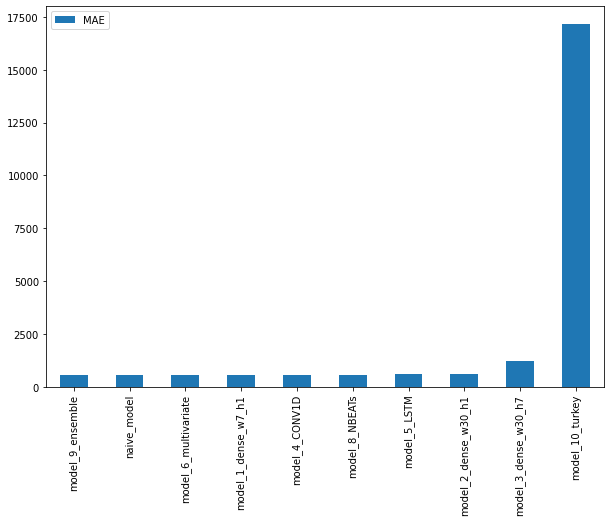

In [ ]:
# Sort model results by MAE and plot them
model_results[["MAE"]].sort_values(by="MAE").plot(figsize=(10, 7), kind="bar");